
#Segmentation and Least Square method perspective transform





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive/test-paper detector/detectron2

/content/drive/My Drive/test-paper detector/detectron2


In [ ]:
# torchvision 설치
!pip install -U torch torchvision
!pip install git+https://github.com/facebookresearch/fvcore.git
import torch, torchvision
torch.__version__

     |████████████████████████████████| 831.4 MB 6.8 kB/s 
     |████████████████████████████████| 22.1 MB 60 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu111
    Uninstalling torch-1.9.0+cu111:
      Successfully uninstalled torch-1.9.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.0+cu111
    Uninstalling torchvision-0.10.0+cu111:
      Successfully uninstalled torchvision-0.10.0+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.9.1 which is incompatible.
  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-p0_lqc8y
  Running command git clone -q https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-p0_lqc8y
     |████████████████████████████████| 596 kB 5.3 MB/s 
  Created w

'1.9.1+cu102'

In [ ]:
# detectron2 original repo clone
%cd /content/drive/My Drive/test-paper detector/detectron2
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo

/content/drive/My Drive/test-paper detector/detectron2
fatal: destination path 'detectron2_repo' already exists and is not an empty directory.
Obtaining file:///content/drive/My%20Drive/test-paper%20detector/detectron2/detectron2_repo
     |████████████████████████████████| 74 kB 2.2 MB/s 
     |████████████████████████████████| 145 kB 11.2 MB/s 
     |████████████████████████████████| 130 kB 42.9 MB/s 
     |████████████████████████████████| 743 kB 37.2 MB/s 
     |████████████████████████████████| 748 kB 36.2 MB/s 
     |████████████████████████████████| 112 kB 44.7 MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141230 sha256=73b9c2d910ba2f71a264c0f68153290d7a2be03e28458d6b252233cee5a41efe
  Stored in directory: /root/.cache/pip/wheels/ca/33/b7/336836125fc9bb4ceaa4376d8abca10ca8bc84ddc824baea6c
Successfully built antlr4-python3-runtime
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Unins

In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

cfg = get_cfg()
cfg.merge_from_file("./detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.DATASETS.TRAIN = ("test-paper",)
cfg.DATASETS.TEST = ()   # no metrics implemented for this dataset
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"  # initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.02
cfg.SOLVER.MAX_ITER = 300    # 300 iterations seems good enough, but you can certainly train longer
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # 1 classes (paper)

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
#trainer = DefaultTrainer(cfg)
#trainer.resume_or_load(resume=False)
#trainer.train()

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
cfg.MODEL.WEIGHTS = "/content/drive/My Drive/test-paper detector/detectron2/output/model_final.pth" 
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model
cfg.DATASETS.TEST = ("test-paper", )
predictor = DefaultPredictor(cfg)

In [ ]:
path = "/content/drive/My Drive/test-paper detector/detectron2/data/segmentation_images/test/0064_seg.jpg"

im = cv2.imread(path)
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])
#result = cv2.resize(v.get_image()[:, :, ::-1], dsize=(189, 252))
#cv2.imshow(result)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#get boxes and masks
import matplotlib.pyplot as plt 
from matplotlib import cm
ins = outputs["instances"]
#pred_masks = ins.get_fields()["pred_masks"]
#boxes = ins.get_fields()["pred_boxes"]    
#pred_masks
ins

Instances(num_instances=1, image_height=4032, image_width=3024, fields=[pred_boxes: Boxes(tensor([[ 342.4244,  291.5585, 2824.7258, 3556.5107]], device='cuda:0')), scores: tensor([0.9866], device='cuda:0'), pred_classes: tensor([0], device='cuda:0'), pred_masks: tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]]], device='cuda:0')])

In [ ]:
pred_masks = ins.get_fields()["pred_masks"]
pred_masks

tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]]], device='cuda:0')

In [ ]:
pred_masks.size()

torch.Size([1, 4032, 3024])

In [ ]:
pred_masks[0]

tensor([[False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        ...,
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False]], device='cuda:0')

In [ ]:
## 가장자리 true 값 좌표 알기 / A, B 행렬에 넣기
from matplotlib import pyplot as plt
import numpy as np

upA = np.empty((0,2), int)
upB = np.array([])
rightA = np.empty((0,2), int)
rightB = np.array([])
leftA = np.empty((0,2), int)
leftB = np.array([])
downA = np.empty((0,2), int)
downB = np.array([])

## scatter를 위한 list
#uplistx = []
#uplisty = []
#rightlistx = []
#rightlisty = []
#leftlistx = []
#leftlisty = []
#downlistx = []
#downlisty = [] 
#totalx = []
#totaly = []

for i in range(0, pred_masks.size()[1],2):
  for j in range(0, pred_masks.size()[2],2):
    if(pred_masks[0][i][j] == True):

      if (pred_masks[0][i-1][j] == False and pred_masks[0][i+1][j] == True):
        if(len(upA) == 0 or upA[-1][0] == j):
          upA = np.append(upA, np.array([[j, 1]]), axis=0)
          upB = np.append(upB, np.array([i]))
          #uplistx.append(j)
          #uplisty.append(i)
          #totalx.append(j)
          #totaly.append(i)
          continue

        if(abs((upB[-1] - i) / (upA[-1][0] - j)) < 3):
          upA = np.append(upA, np.array([[j, 1]]), axis=0)
          upB = np.append(upB, np.array([i]))
          #uplistx.append(j)
          #uplisty.append(i)
          #totalx.append(j)
          #totaly.append(i)

          if(len(upA) == 1):
            upA.pop(0)
            upB.pop(0)


      elif (pred_masks[0][i][j+1] == False and pred_masks[0][i][j-1] == True):
        if(len(rightA) == 0 or rightA[-1][0] == j):
          rightA = np.append(rightA, np.array([[j, 1]]), axis=0)
          rightB = np.append(rightB, np.array([i]))
          #rightlistx.append(j)
          #rightlisty.append(i)
          #totalx.append(j)
          #totaly.append(i)
          continue

        if(abs((rightB[-1] - i )/ (rightA[-1][0] - j)) > 6):
          rightA = np.append(rightA, np.array([[j, 1]]), axis=0)
          rightB = np.append(rightB, np.array([i]))
          #rightlistx.append(j)
          #rightlisty.append(i)
          #totalx.append(j)
          #totaly.append(i)
          
          if(len(rightA) == 1):
            rightA.pop(0)
            rightB.pop(0)
        

      elif (pred_masks[0][i][j-1] == False and pred_masks[0][i][j+1] == True):
        if(len(leftA) == 0 or leftA[-1][0] == j):
          leftA = np.append(leftA, np.array([[j, 1]]), axis=0)
          leftB = np.append(leftB, np.array([i]))
          #leftlistx.append(j)
          #leftlisty.append(i)
          #totalx.append(j)
          #totaly.append(i)
          continue
          
        if(abs((leftB[-1] - i )/ (leftA[-1][0] - j)) > 6):
          leftA = np.append(leftA, np.array([[j, 1]]), axis=0)
          leftB = np.append(leftB, np.array([i]))
          #leftlistx.append(j)
          #leftlisty.append(i)
          #totalx.append(j)
          #totaly.append(i)

          if (len(leftA) == 1):
            leftA.pop(0)
            leftB.pop(0)


      elif (pred_masks[0][i+1][j] == False and pred_masks[0][i-1][j] == True):
        if(len(downB) == 0 or downA[-1][0] == j):
          downA = np.append(downA, np.array([[j, 1]]), axis=0)
          downB = np.append(downB, np.array([i]))
          #downlistx.append(j)
          #downlisty.append(i)
          #totalx.append(j)
          #totaly.append(i)

          continue
        if(abs((downB[-1] - i )/ (downA[-1][0] - j)) < 3):
          downA = np.append(downA, np.array([[j, 1]]), axis=0)
          downB = np.append(downB, np.array([i]))
          #downlistx.append(j)
          #downlisty.append(i)
          #totalx.append(j)
          #totaly.append(i)

          if(len(downA) == 1):
            downA.pop(0)
            downB.pop(0)

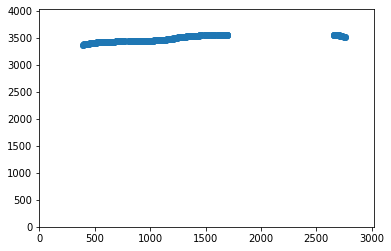

In [ ]:
plt.scatter(downlistx, downlisty)
#plt.xlim([0, 960])
#plt.ylim([0, 1280])
plt.xlim([0, 3024])
plt.ylim([0, 4032])
plt.show()

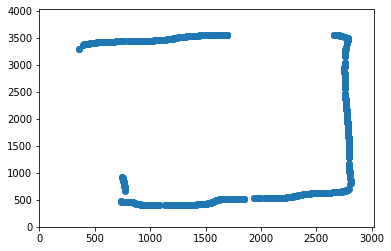

In [ ]:
plt.scatter(totalx, totaly)
#plt.xlim([0, 960])
#plt.ylim([0, 1280])
plt.xlim([0, 3024])
plt.ylim([0, 4032])
plt.show()

In [ ]:
## 기울기, y절편 계산
import numpy.linalg as lin

X_up = np.linalg.inv(upA.T.dot(upA)).dot(upA.T).dot(upB)
X_right = np.linalg.inv(rightA.T.dot(rightA)).dot(rightA.T).dot(rightB)
X_left = np.linalg.inv(leftA.T.dot(leftA)).dot(leftA.T).dot(leftB)
X_down = np.linalg.inv(downA.T.dot(downA)).dot(downA.T).dot(downB)

[1.42317323e-01 2.61288545e+02]
[1.42317323e-01 2.61288545e+02]


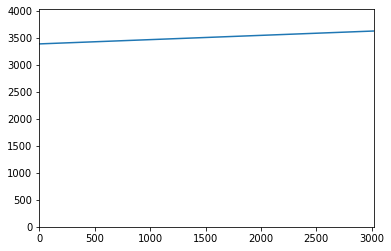

In [ ]:
x = np.arange(0, 3024, 1)
y = [X_down[0] * num + X_down[1] for num in x]

plt.plot(x, y)
plt.xlim([0, 3024])
plt.ylim([0, 4032])
#plt.xlim([0, 960])
#plt.ylim([0, 1280])
plt.show()

In [ ]:
upandleftA = np.array([[-X_up[0], 1], [-X_left[0], 1]])
upandleftB = np.array([X_up[1], X_left[1]])
itpoint_1 = np.linalg.solve(upandleftA,upandleftB)

if(itpoint_1[0] < 0):
  itpoint_1[0] = 0
if(itpoint_1[1] < 0):
  itpoint_1[1] = 0

itpoint_1

array([827.49342052, 379.05519358])

In [ ]:
upandrightA = np.array([[-X_up[0], 1], [-X_right[0], 1]])
upandrightB = np.array([X_up[1], X_right[1]])
itpoint_2 = np.linalg.solve(upandrightA,upandrightB)

if(itpoint_2[0] > pred_masks.size()[2]):
  itpoint_2[0] = pred_masks.size()[2]
if(itpoint_2[1] < 0):
  itpoint_2[1] = 0

itpoint_2

array([2818.72902939,  662.44251537])

In [ ]:
downandleftA = np.array([[-X_down[0], 1], [-X_left[0], 1]])
downandleftB = np.array([X_down[1], X_left[1]])
itpoint_3 = np.linalg.solve(downandleftA,downandleftB)

if(itpoint_3[0] < 0):
  itpoint_3[0] = 0
if(itpoint_3[1] > pred_masks.size()[1]):
  itpoint_3[1] = pred_masks.size()[1]

itpoint_3

array([ 332.9667617 , 3417.85511303])

In [ ]:
downandrightA = np.array([[-X_down[0], 1], [-X_right[0], 1]])
downandrightB = np.array([X_down[1], X_right[1]])
itpoint_4 = np.linalg.solve(downandrightA,downandrightB)

if(itpoint_4[0] > pred_masks.size()[2]):
  itpoint_4[0] = pred_masks.size()[2]
if(itpoint_4[1] > pred_masks.size()[1]):
  itpoint_4[1] = pred_masks.size()[1]
  
itpoint_4

array([2737.7089744 , 3608.14214689])

In [ ]:
# 각 꼭지점의 좌표
print(itpoint_1, itpoint_2, itpoint_3, itpoint_4)

[827.49342052 379.05519358] [2818.72902939  662.44251537] [ 332.9667617  3417.85511303] [2737.7089744  3608.14214689]


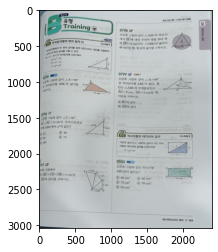

In [ ]:
### 각 좌표로 Perspective Transform

from PIL import Image

pts1 = np.float32([itpoint_1, itpoint_2, itpoint_4, itpoint_3])

w1 = abs(itpoint_1[0] - itpoint_2[0])
w2 = abs(itpoint_3[0] - itpoint_4[0])
h1 = abs(itpoint_1[1] - itpoint_3[1])
h2 = abs(itpoint_2[1] - itpoint_4[1])
width = max([w1, w2])
height = max([h1, h2])

pts2 = np.float32([[0,0], [width-1, 0], [width-1, height-1], [0, height-1]])

mtrx = cv2.getPerspectiveTransform(pts1, pts2)

result = cv2.warpPerspective(im, mtrx, (int(width), int(height)))
plt.imshow(result)
save = Image.fromarray(result, 'RGB')
save.save("/content/drive/MyDrive/test-paper detector/detectron2/data/lsmtest.jpg")